# HOW WE GET DATA AND DO Survival Analysis

In this example, we choose the laml cancer and TP53 gene to analysis.

pip3 install lifelines==0.14.1#lifelines's version must be 0.14.1.
<br/>need pandas,requests,numpy.

In [1]:
import requests

In [2]:
import pandas as pd

<h2>get the information including OS_MONTHS(living time) and OS_STATUS(living or dead) of all samples about laml cancer.</h2><br/>

In [3]:
sur=pd.read_csv('http://www.cbioportal.org/webservice.do?cmd=getClinicalData&case_set_id=laml_tcga_all',index_col=0,sep="\t")

In [4]:
sur.shape

(200, 37)

In [5]:
sur[:5]

,ABNORMAL_LYMPHOCYTE_PERCENT,AGE,ATRA_EXPOSURE,BASOPHILS_COUNT,BLAST_COUNT,CANCER_TYPE,CANCER_TYPE_DETAILED,CYTOGENETIC_ABNORMALITY_TYPE,DFS_MONTHS,DFS_STATUS,...,PRIMARY_SITE,RACE,SAMPLE_COUNT,SAMPLE_TYPE,SAMPLE_TYPE_ID,SEX,SITE_OF_TUMOR_TISSUE,TISSUE_SOURCE_SITE,VIAL_NUMBER,VITAL_STATUS
CASE_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AB-2882-03,2.0,73,NO,0.0,16,Leukemia,Acute Myeloid Leukemia,Normal|del(7q) / 7q-,NaN,NaN,...,Peripheral Blood,WHITE,1,Primary,3,Female,Bone Marrow,AB,A,Dead
TCGA-AB-2991-03,0.0,40,NaN,0.0,0,Leukemia,Acute Myeloid Leukemia,+8|t(15;17) and variants,59.99,DiseaseFree,...,Peripheral Blood,WHITE,1,Primary,3,Female,Bone Marrow,AB,A,Alive
TCGA-AB-2847-03,0.0,53,NO,1.0,41,Leukemia,Acute Myeloid Leukemia,Normal|del(7q) / 7q-,NaN,NaN,...,Peripheral Blood,WHITE,1,Primary,3,Male,Bone Marrow,AB,A,Dead
TCGA-AB-2979-03,0.0,30,NO,0.0,88,Leukemia,Acute Myeloid Leukemia,Normal,22.04,DiseaseFree,...,Peripheral Blood,WHITE,1,Primary,3,Female,Bone Marrow,AB,A,Alive
TCGA-AB-2818-03,0.0,62,NO,0.0,53,Leukemia,Acute Myeloid Leukemia,Normal,NaN,NaN,...,Peripheral Blood,ASIAN,1,Primary,3,Female,Bone Marrow,AB,A,Dead


In [6]:
r = requests.get(
    'http://www.cbioportal.org/api/sample-lists/laml_tcga_rna_seq_v2_mrna/sample-ids',
    headers={'Content-Type': 'application/json;charset=UTF-8'}
)

In [7]:
samples = r.json()

In [8]:
sur=sur.loc[samples,:]

In [9]:
sur.loc[:,['OS_MONTHS','OS_STATUS']][:10]

,OS_MONTHS,OS_STATUS
CASE_ID,,
TCGA-AB-2803-03,26.02,DECEASED
TCGA-AB-2805-03,18.96,DECEASED
TCGA-AB-2806-03,31.04,DECEASED
TCGA-AB-2807-03,5.95,DECEASED
TCGA-AB-2808-03,93.99,LIVING
TCGA-AB-2810-03,1.02,DECEASED
TCGA-AB-2811-03,7.98,DECEASED
TCGA-AB-2812-03,12.02,DECEASED
TCGA-AB-2813-03,1.02,DECEASED


In [10]:
import json

<h2>now i know the entrezGeneId of 'TP53'gene is 7157,get the all samples's expression of this gene.</h2>

In [11]:
r = requests.post(
    'http://www.cbioportal.org/api/molecular-data/fetch?projection=DETAILED',
    headers={'Content-Type': 'application/json;charset=UTF-8'},
    data=json.dumps({
        "entrezGeneIds": [7157],
        "sampleMolecularIdentifiers":[
            {
                "molecularProfileId":"laml_tcga_rna_seq_v2_mrna_median_Zscores",
                "sampleId":sample
            } for sample in samples]
    })
)

In [12]:
from collections import defaultdict

In [13]:
expressions = defaultdict(dict)
for item in r.json():
    expressions[item['sampleId']][item['entrezGeneId']] = item['value']

In [14]:
expressions = pd.DataFrame.from_dict(expressions, orient='index')

In [15]:
expressions[:10]#dataframe expressions is the all samples's expression of this gene.

,7157
TCGA-AB-2803-03,-0.3452
TCGA-AB-2805-03,-1.0989
TCGA-AB-2806-03,0.9359
TCGA-AB-2807-03,-0.6670
TCGA-AB-2808-03,0.1198
TCGA-AB-2810-03,0.2752
TCGA-AB-2811-03,-2.3190
TCGA-AB-2812-03,-0.2541
TCGA-AB-2813-03,-0.0980
TCGA-AB-2814-03,-0.5238


<h2>merged</h2>

In [16]:
clinical=sur.loc[:,['OS_MONTHS','OS_STATUS']].copy()

In [17]:
clinical['expression']=expressions[7157]

In [18]:
clinical['Schrodinger s cat']=clinical.apply(lambda x:1 if x['OS_STATUS']=='DECEASED' else 0,axis=1)

In [19]:
clinical=clinical.loc[clinical['OS_MONTHS'].notna()&clinical['OS_STATUS'].notna()]

In [20]:
clinical[:15]

,OS_MONTHS,OS_STATUS,expression,Schrodinger s cat
CASE_ID,,,,
TCGA-AB-2803-03,26.02,DECEASED,-0.3452,1
TCGA-AB-2805-03,18.96,DECEASED,-1.0989,1
TCGA-AB-2806-03,31.04,DECEASED,0.9359,1
TCGA-AB-2807-03,5.95,DECEASED,-0.6670,1
TCGA-AB-2808-03,93.99,LIVING,0.1198,0
TCGA-AB-2810-03,1.02,DECEASED,0.2752,1
TCGA-AB-2811-03,7.98,DECEASED,-2.3190,1
TCGA-AB-2812-03,12.02,DECEASED,-0.2541,1
TCGA-AB-2813-03,1.02,DECEASED,-0.0980,1


<h2>Survival Analysis<h2>

In [21]:
alterations = clinical.loc[clinical['expression'].abs() >= 2].copy()#different expression
noalterations = clinical.loc[clinical['expression'].abs() < 2].copy()
#abs(expression)< is not differential expression,abs(expression) is differential expression

In [22]:
%matplotlib inline
from lifelines.estimation import KaplanMeierFitter
from lifelines.statistics import logrank_test
from matplotlib import pyplot as plt

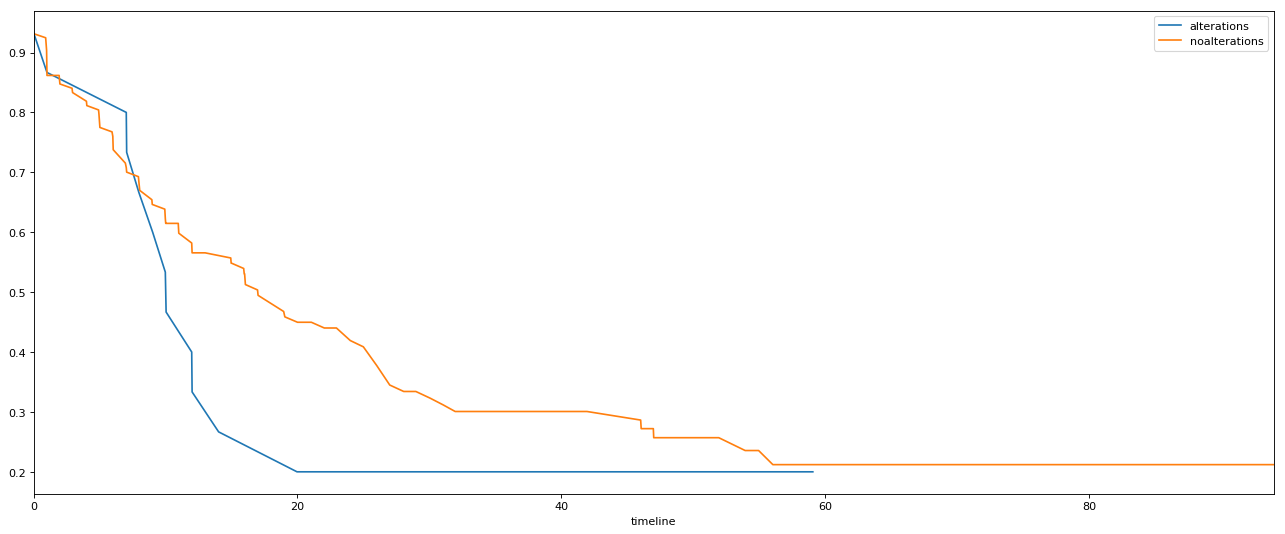

In [23]:
plt.figure(figsize=(20,8),dpi=80)#KaplanMeierFitter方法
kmf = KaplanMeierFitter()
ax = plt.subplot(111)
kmf.fit(alterations['OS_MONTHS'], alterations['Schrodinger s cat'], label='alterations')
kmf.survival_function_.plot(ax=ax)
kmf.fit(noalterations['OS_MONTHS'], noalterations['Schrodinger s cat'], label='noalterations')
kmf.survival_function_.plot(ax=ax)

Log-rank test

In [24]:
sumarry = logrank_test(
    alterations['OS_MONTHS'], noalterations['OS_MONTHS'],alterations['Schrodinger s cat'],
    noalterations['Schrodinger s cat'], alpha=0.99
)

In [25]:
sumarry.p_value

0.3394895608613677

In [26]:
sumarry.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

 test_statistic      p   
         0.9124 0.3395   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [27]:
data = kmf.confidence_interval_.join(kmf.survival_function_['noalterations'])

In [28]:
data[:10]

,noalterations_upper_0.95,noalterations_lower_0.95,noalterations
0.00,0.962548,0.876442,0.931507
0.92,0.957525,0.867997,0.924607
0.99,0.941842,0.842882,0.903751
1.02,0.908500,0.793877,0.861716
1.94,0.908500,0.793877,0.861716
2.00,0.896830,0.777609,0.847473
2.92,0.890889,0.769456,0.840291
2.96,0.884908,0.761347,0.833109
4.01,0.872742,0.745078,0.818620
4.04,0.866604,0.737004,0.811376
